In [1]:
#Import packages
import pandas as pd
import numpy as np
import os

import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading df
df = pd.read_csv('churn_clean.csv')

In [3]:
#Quick look of df
df

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,...,159.979400,6511.252601,3,2,3,3,4,3,2,3
9996,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,...,207.481100,5695.951810,4,5,5,4,4,5,2,5
9997,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,...,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,3e1f269b40c235a1038863ecf6b7a0df,Carrollton,GA,Carroll,30117,33.58016,-85.13241,...,252.624000,6468.456752,4,4,6,4,3,3,5,4


In [4]:
#List columns of df
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [5]:
df = df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
        'Email', 'Contacts', 
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport',
       'PaperlessBilling', 'PaymentMethod', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'])

In [6]:
#nulls
df.isnull().sum()

Outage_sec_perweek      0
Yearly_equip_failure    0
StreamingTV             0
StreamingMovies         0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
dtype: int64

In [7]:
#duplicates
df.duplicated().sum()

0

<AxesSubplot:xlabel='Bandwidth_GB_Year'>

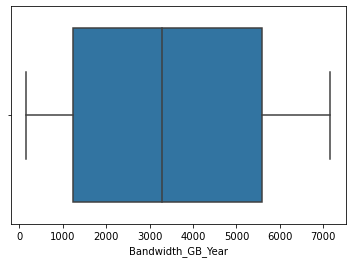

In [8]:
#outliers
sns.boxplot('Bandwidth_GB_Year', data = df)

<AxesSubplot:xlabel='Tenure'>

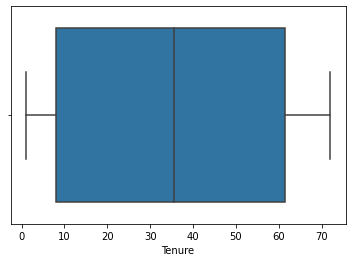

In [9]:
sns.boxplot('Tenure', data = df)

<AxesSubplot:xlabel='MonthlyCharge'>

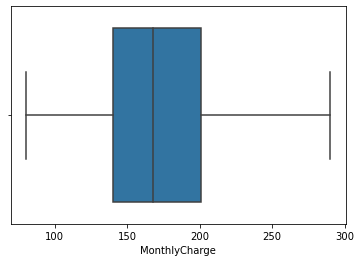

In [10]:
sns.boxplot('MonthlyCharge', data = df)

In [11]:
#Encoding to Dummy variables
df['DummyStreamingMovies'] = [1 if v == 'Yes' else 0 for v in df['StreamingMovies']]
df['DummyStreamingTV'] = [1 if v == 'Yes' else 0 for v in df['StreamingTV']]

In [12]:
#Dropping original variables prior to encoding to dummy variables
df = df.drop(columns= ['StreamingMovies', 'StreamingTV' ])

In [13]:
#Extract clean data set
df.to_csv('clean_churn2.csv')

In [14]:
#Load clean data set
df2 = pd.read_csv('clean_churn2.csv')

In [15]:
df2.columns

Index(['Unnamed: 0', 'Outage_sec_perweek', 'Yearly_equip_failure', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'DummyStreamingMovies',
       'DummyStreamingTV'],
      dtype='object')

In [16]:
df2 = df2.drop(columns =['Unnamed: 0'])

In [17]:
#Scales the data. Returns the z-scores of every variable
 
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

df2['Bandwidth_GB_Year'] = std_scale.fit_transform(df2[['Outage_sec_perweek', 'Yearly_equip_failure', 
                                                       'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 
                                                       'DummyStreamingMovies', 'DummyStreamingTV']])


In [20]:
#Copy all the predictor variables into X dataframe
X = df2.drop('Bandwidth_GB_Year', axis=1)
 
#Copy target into the y dataframe. Target variable is converted into the Log. 
y = np.log(df[['Bandwidth_GB_Year']])

#Splitting X & y into training and testing set with 80:20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=1)

frames_train = [X_train, y_train]
df2_train = pd.concat(frames_train, axis = 1)

frames_test = [X_test, y_test]
df2_test = pd.concat(frames_test, axis = 1)

#Export training & testing files
df2_train.to_csv('d209t2_train.csv')
df2_test.to_csv('d209t2_test.csv')

In [21]:
#LinearRegression function to find the best fit model on training data
 
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

#Exploring coefficients of the independent variables
 
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Outage_sec_perweek is -3.1453761902903105e-05
The coefficient for Yearly_equip_failure is -0.003629232628326367
The coefficient for Tenure is 0.03010267862803701
The coefficient for MonthlyCharge is 0.0007140948805749882
The coefficient for DummyStreamingMovies is 0.07678481481924629
The coefficient for DummyStreamingTV is 0.09101414364726779


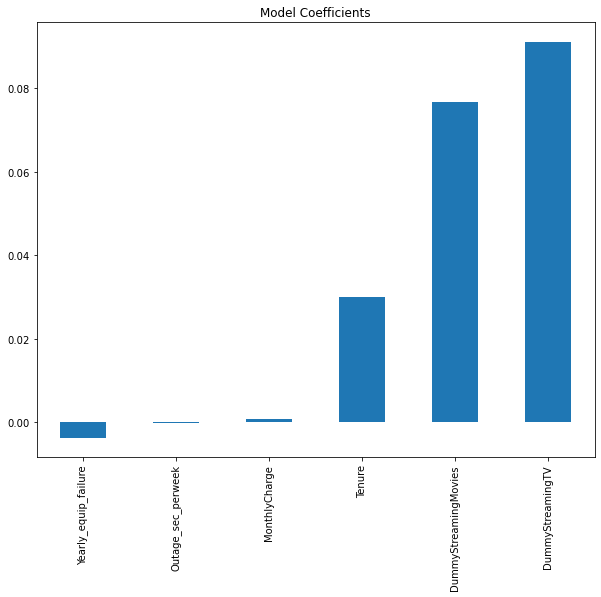

In [22]:
#Displaying the intensity of the coefficients
from pandas import Series, DataFrame
predictors = X_train.columns
 
coef = Series(regression_model.coef_.flatten(), predictors).sort_values()
plt.figure(figsize=(10,8))
 
coef.plot(kind='bar', title='Model Coefficients')
plt.show()

In [23]:
#Finding the optimal alpha value
#Creating ridge regression with possible alpha values
from sklearn.linear_model import RidgeCV
regr_cv = RidgeCV(alphas=[0.1, 1.0, 10.0])

#Fitting the linear regression
model_cv = regr_cv.fit(X, y)

#View optimal alpha value
model_cv.alpha_

10.0

In [25]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
 
ridge=Ridge(alpha = 10)
ridge.fit(X_train, y_train)
pred_train_ridge = ridge.predict(X_train)

pred_test_ridge = ridge.predict(X_test)

#Printing mean squared error
print(mean_squared_error(y_test, pred_test_ridge))

#Printing r2 score
print(r2_score(y_test, pred_test_ridge))

0.055615766294614746
0.9198261971740688
